In [1]:
# IMPORTING THE DATASETS
import numpy as np
import pandas as pd

In [2]:
# LOAD THE DATASETS
messages = pd.read_csv("spam.csv",header=None,encoding='latin-1')

In [3]:
messages

,0,1,2,3,4
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
...,...,...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5569,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5570,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5571,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
messages.shape

(5573, 5)

In [5]:
# FOR ARRANGING IN TWO COLUMNS V1 AND V2
messages= messages[[0, 1]]
messages.columns=['label','message']
print(messages.head())

  label                                            message
0    v1                                                 v2
1   ham  Go until jurong point, crazy.. Available only ...
2   ham                      Ok lar... Joking wif u oni...
3  spam  Free entry in 2 a wkly comp to win FA Cup fina...
4   ham  U dun say so early hor... U c already then say...


In [6]:
# JUST FOR CHECKING
messages['message'].loc[451]

'hanks lotsly!'

In [7]:
# DATA CLEANING AND PREPROCESSING
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chiru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [9]:
len(messages)

5573

In [10]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z0-9]',' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
corpus

['v2',
 'go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week f

In [12]:
# CREATING THE BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()

In [13]:
x[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
x.shape

(5573, 2500)

In [15]:
# TO CONVERT CATEGORICAL INTO NUMBERS
y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values

In [16]:
y[1]

False

In [17]:
# CREATING THE TFIDF FEATURE 
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500,ngram_range=(1,2))
x = tv.fit_transform(corpus).toarray()

In [18]:
corpus

['v2',
 'go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week f

In [19]:
x[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
# TRAIN TEST split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [21]:
x_train, y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ True, False, False, ..., False, False, False]))

In [22]:
# MODEL SELECTION --------> NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import MultinomialNB
spam_detect_model= MultinomialNB().fit(x_train, y_train)

In [23]:
y_pred = spam_detect_model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9757847533632287


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       982
        True       0.86      0.98      0.92       133

    accuracy                           0.98      1115
   macro avg       0.93      0.98      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[961   3]
 [ 21 130]]


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

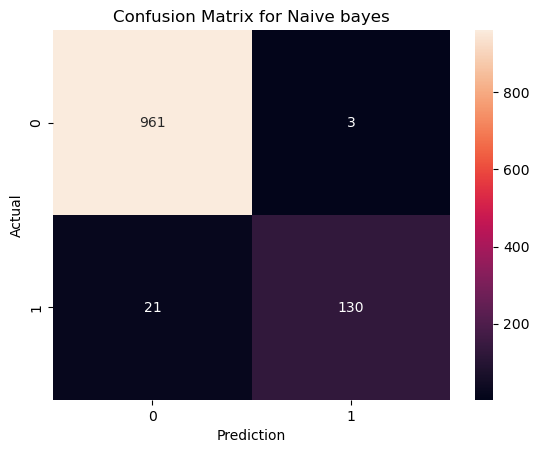

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive bayes')
plt.show()

In [41]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
y_pred = classifier.predict(x_test)

In [43]:
score=accuracy_score(y_pred,y_test)
print(score)

0.979372197309417


In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       981
        True       0.87      0.98      0.92       134

    accuracy                           0.98      1115
   macro avg       0.93      0.98      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[961   3]
 [ 20 131]]


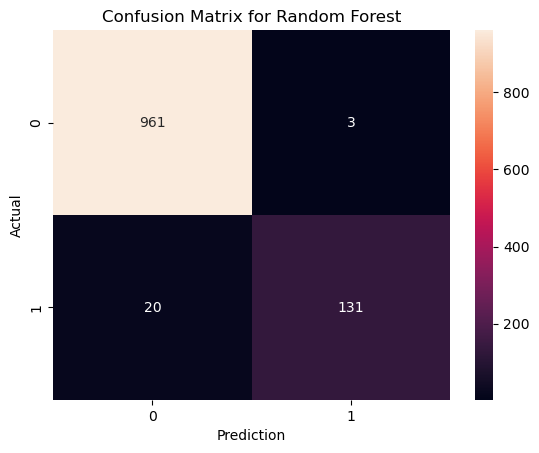

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()